In [71]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import preprocessing

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import discriminant_analysis
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm


# Part 1: Visualizing the Data
For categorical features like "SMOKING," assume that "1" indicates that the person does not belong to this class and "2" indicates that the person does in fact belong to this class.

In [81]:
data_file = "../data/survey-lung-cancer.csv"
GENDER = "GENDER"
AGE = "AGE"
SMOKING = "SMOKING"
LUNG_CANCER = "LUNG_CANCER"
CHRONIC_DISEASE = "CHRONIC DISEASE"
data = pd.read_csv(data_file)

# Convert the "1/2" categorical values to "0/1" and "No/Yes" in the lung cancer column into "0/1"
for col in data.columns:
    if col != AGE:
        data[col] = data[col].astype('category').cat.codes      
data 

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [3]:
# Separate the data into people without lung cancer and those with it
no_data = data[data[LUNG_CANCER] == 0]
yes_data = data[data[LUNG_CANCER] == 1]

## Feature Investigation
Let's look at a few features and how they correlate with lung cancer:

## Age
Most of the survey participants were > 40 years of age.

In [4]:
yes_data[AGE].plot(title="Age vs. lung cancer", kind="hist")
no_data[AGE].plot(kind="hist")

## Smoking

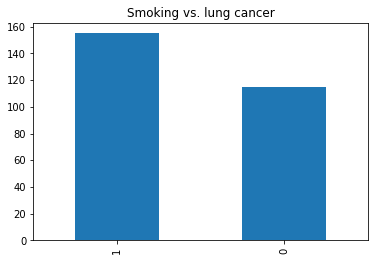

In [5]:
yes_data[SMOKING].value_counts().plot(title="Smoking vs. lung cancer", kind="bar")

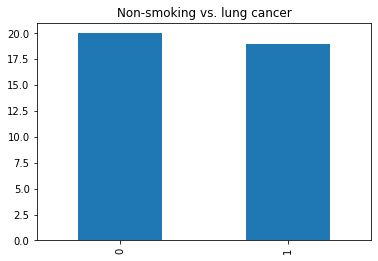

In [6]:
no_data[SMOKING].value_counts().plot(title="Non-smoking vs. lung cancer", kind="bar")

## Chronic Disease

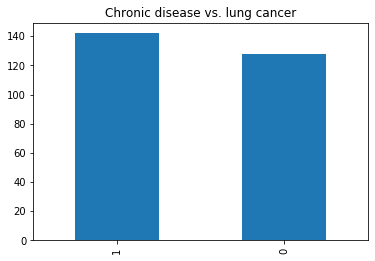

In [7]:
yes_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

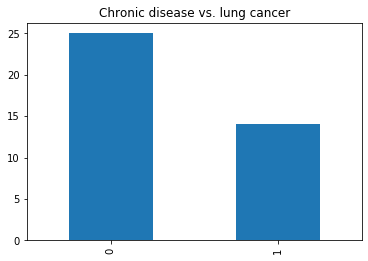

In [8]:
no_data[CHRONIC_DISEASE].value_counts().plot(title="Chronic disease vs. lung cancer", kind="bar")

# Part 2: Making Predictions

In [84]:
# Separate the data into training and validation sets
data_X = data.iloc[:, 0:15]
data_X = preprocessing.scale(data_X) # Scaling helps LinearSVC converge
data_y = data.iloc[:, 15]
train_X, test_X, train_y, test_y = model_selection.train_test_split(data_X, data_y, test_size=0.5, random_state=0)

In [107]:
def run_classifiers(classifiers, train_X, train_y, test_X, test_y):
    """
    Fits each classifier to the training data and runs it on the test data.
    Prints out the training and test accuracies. 
    """
    results = [] # list of 3-tuples: (classifier name, train accuracy, test accuracy)
    
    # Baseline: a random predictor that guesses "YES" for each data point
    rand_train_pred = np.full(train_y.size, 1)
    rand_test_pred = np.full(test_y.size, 1)
    
    rand_train_results = (rand_train_pred == train_y)    
    rand_train_acc = np.count_nonzero(rand_train_results) / train_y.size
    
    rand_test_results = (rand_test_pred == test_y)    
    rand_test_acc = np.count_nonzero(rand_test_results) / test_y.size
    
    # Add random results to list
    results.append( ("Random Classifier", rand_train_acc, rand_test_acc))
    
    for clf in classifiers:       
        # Run classifier on train and test data
        clf.fit(train_X, train_y)
        train_pred = clf.predict(train_X)
        train_results = (train_pred == train_y)
        train_acc = np.count_nonzero(train_results) / train_y.size
        
        test_pred = clf.predict(test_X)
        test_results = (test_pred == test_y)
        test_acc = np.count_nonzero(test_results) / test_y.size
        
        # Store results
        results.append( ((type(clf).__name__), train_acc, test_acc) )
        
    return results

In [109]:
classifiers = [
    neighbors.KNeighborsClassifier(),
    naive_bayes.GaussianNB(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    linear_model.LogisticRegression(solver="lbfgs", max_iter=200),
    tree.DecisionTreeClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(n_estimators=100),
    svm.LinearSVC(C=0.01, max_iter=100)
]
results = run_classifiers(classifiers, train_X, train_y, test_X, test_y)

[('Random Classifier', 0.9025974025974026, 0.8451612903225807),
 ('KNeighborsClassifier', 0.935064935064935, 0.864516129032258),
 ('GaussianNB', 0.9415584415584416, 0.8774193548387097),
 ('LinearDiscriminantAnalysis', 0.948051948051948, 0.9161290322580645),
 ('LogisticRegression', 0.948051948051948, 0.9032258064516129),
 ('DecisionTreeClassifier', 1.0, 0.864516129032258),
 ('AdaBoostClassifier', 0.974025974025974, 0.8903225806451613),
 ('RandomForestClassifier', 1.0, 0.864516129032258),
 ('LinearSVC', 0.935064935064935, 0.8709677419354839)]

In [110]:
# Graph the results